# 1 Logistic Regression / LDA

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving classification.csv to classification (2).csv


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("classification.csv")  #reading the dataset and storing in df
df

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


In [ ]:
#standardize
df['age'] = (df['age'] - df['age'].mean())/np.std(df['age'])
df['interest'] = (df['interest'] - df['interest'].mean())/np.std(df['interest'])
df

,age,interest,success
0,-0.005867,-1.283180,0.0
1,-0.128374,-1.323815,0.0
2,0.999394,-0.799421,0.0
3,-1.920167,-0.970912,1.0
4,-1.051840,-1.378487,0.0
...,...,...,...
292,0.450613,-1.285945,0.0
293,-0.967194,1.141170,1.0
294,-0.163333,0.979355,1.0
295,0.222363,1.967736,1.0


### 1. Plot the dataset using different colors for the two classes.

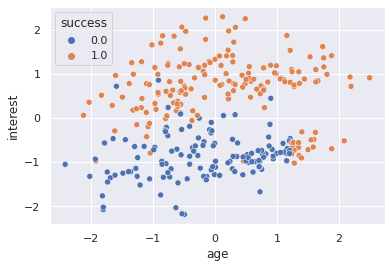

In [ ]:
sns.scatterplot(data=df,x=df['age'], y=df['interest'],  hue=df['success'])  #plotting the dataset

### 2. Implement the least square method for classification and plot the decision boundary. Clearly describe your results. Is the decision boundary able to classify the points correctly?

In [ ]:
class leastSquare: 
  def findW(self,X,Y): 
    X_T = X.transpose()                               # X^T =  tranpose(X)
      
    res = np.matmul(X_T,X)                            # X^T * X
      
    res2 = np.linalg.inv(res)                         # inverse(X^T * X)
      
    res3 = np.matmul(res2,X_T)                        # inverse(X^T * X) * X^T
      
    opt_W = np.matmul(res3,Y)                         # inverse(X^T * X) * X^T * Y

    
    return opt_W

(297, 3)
(297, 1)
[[0.56902357]
 [0.03266792]
 [0.37204239]]


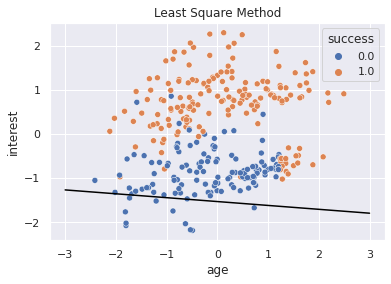

In [ ]:
X = []          
Y = []                                  
for index, row in df.iterrows():                  #create Matrix X and Y
  ro = []
  yro = []
  ro.append(1)
  ro.append(row['age'])
  ro.append(row['interest'])
  X.append(ro)
  if(row['success']==0):
    #yro.append(1)
    yro.append(0)
  else:
    #yro.append(0)
    yro.append(1)
  Y.append(yro)

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

model = leastSquare()
opt_W = model.findW(X, Y)                    # Returns optimal W using Least square method

ax = sns.scatterplot(data=df,x=df['age'], y=df['interest'],  hue=df['success'])
ax.set_title('Least Square Method')
line_x = np.linspace(-3, 3)
print(opt_W)
line_y = -opt_W[0] / opt_W[2] - (opt_W[1] / opt_W[2]) * line_x
ax.plot(line_x, line_y, color='black')

**OBSERVATIONS:**


*   We plot the decision boundary using Least square Method.
*   As we can see that the boundary is highly sensitive to outliers.
*   So, the decision boundary is not able to classify the points correctly.





### Implement the logistic regression using gradient descent method. Choose the initial values of w in the range [−0.1, 0.1]. Plot a 3D figure depicting the sigmoid function obtained along with the same color coding of the points. Did the performance improved as compared to previous question?

In [ ]:
copy_data = df.copy()
X1 = np.array(df['age'])
X2 = np.array(df['interest'])
y= np.array(df['success'])
copy_data.drop(['success'], axis=1, inplace=True)

In [ ]:
import math
class logisticRegression:
  def sigmoid(self,x):                                           # Calculating sigmoid values
    return 1 / (1 + np.exp(-x))
  
  def lr_findW(self,X,y,learning_rate):                  # Finding optimal W or coefficients
    bias = 0
    n_rows, n_features = X.shape
   
    weights = np.random.uniform(-0.1,0.1,n_features)
    iterations = 1000
    
    for e in range(iterations):
      res = np.dot(X, weights) + bias
      y_pred = self.sigmoid(res)
      dw = (np.dot(X.T, (y_pred - y)))/n_rows
      db = (np.sum(y_pred - y))/n_rows
      weights -= learning_rate * dw
      bias -= learning_rate * db
    w=np.insert(weights, 0 , bias)
    return w


### Plot the decision boundary obtained for logistic regression.

[0.93014113 0.61370967 3.33056498]


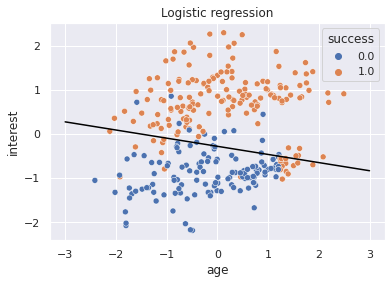

In [ ]:

model = logisticRegression()
opt_W = model.lr_findW(copy_data, y , 0.1)

ax = sns.scatterplot(data=df,x=df['age'], y=df['interest'],  hue=df['success'])
ax.set_title('Logistic regression')
line_x = np.linspace(-3, 3)
print(opt_W)
line_y = -opt_W[0] / opt_W[2] - (opt_W[1] / opt_W[2]) * line_x
ax.plot(line_x, line_y, color='black')

**OBSERVATIONS:**


*   We plot the decision boundary using Logistic Regression.
*   The performance has improved significantly as Logistic Regression is not sensitive to outliers.



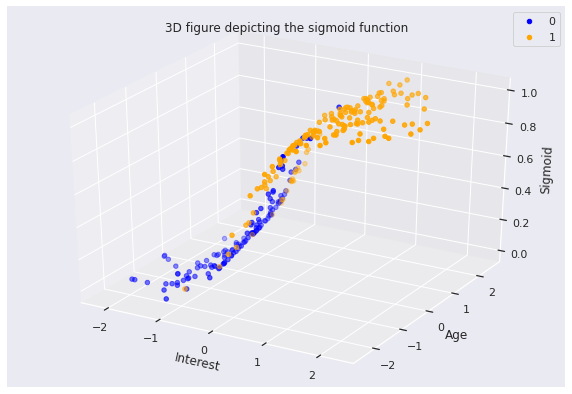

In [ ]:
sigmoid_0 = []                #sigmoid function for class 0
sigmoid_1 = []                #sigmoid function for class 1
X1_0 = []                     # X1 feature for class 0
X2_0 = []                     # X2 feature for class 0
X1_1 = []                     # X1 feature for class 1
X2_1 = []                     # X2 feature for class 1
for i in range(len(df)):
  if(y[i]==0):
    sigmoid_0.append(1.0 / (1.0 + math.exp(-(opt_W[0] + opt_W[1] * X1[i] + opt_W[2] * X2[i]))))
    X1_0.append(X1[i])
    X2_0.append(X2[i])
  elif(y[i]==1):
    sigmoid_1.append(1.0 / (1.0 + math.exp(-(opt_W[0] + opt_W[1] * X1[i] + opt_W[2] * X2[i]))))
    X1_1.append(X1[i])
    X2_1.append(X2[i])
  


from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection = '3d')


ax.set_title('3D figure depicting the sigmoid function')
ax.set_xlabel("Interest")
ax.set_ylabel("Age")
ax.set_zlabel("Sigmoid")

ax.scatter(X2_0, X1_0, sigmoid_0, c='blue',label = '0')
ax.scatter(X2_1, X1_1, sigmoid_1, c='orange',label = '1')
ax.legend()

plt.show()

As we can see sigmoid obtained is similar to S-shape.

### Find the linear discriminant boundary and describe your results.

In [ ]:
class linearDiscriminant:
  def findMean(self,X1_0,X2_0, X1_1, X2_1):
    m0_X1 = np.mean(X1_0)         # Mean for feature 1 of class 0 
    m0_X2 = np.mean(X2_0)         # Mean for feature 2 of class 0 
    m1_X1 = np.mean(X1_1)         # Mean for feature 1 of class 1
    m1_X2 = np.mean(X2_1)         # Mean for feature 2 of class 1
    m0 = []
    m0.append(m0_X1)
    m0.append(m0_X1)
    m0 = np.array(m0) 
    m0 = np.asmatrix(m0)             # Mean of class 0
    m0 = m0.transpose()              # Convert to vector
    m1 = []
    m1.append(m1_X1)
    m1.append(m1_X2)
    m1 = np.array(m1) 
    m1 = np.asmatrix(m1)            # Mean of class 1
    m1 = m1.transpose()             # convert to vector
    return m0, m1

  def findSb(self,m0,m1):
    Sb = np.matmul((m1 - m0), (m1 - m0).transpose())
    return Sb

  def findSw(self,X1_0,X2_0,X1_1,X2_1,m0,m1):
    Sw_0 = [[0,0],[0,0]]
    Sw_0 = np.array(Sw_0)

    for i in range(len(X1_0)):
      X_n = []
      X_n.append(X1_0[i])
      X_n.append(X2_0[i])
      X_n = np.array(X_n)
      X_n = np.asmatrix(X_n)
      X_n = X_n.transpose()
      res = np.matmul((X_n -m0),(X_n - m0).transpose())
      Sw_0 = Sw_0 + res

    Sw_1 = [[0,0],[0,0]]
    Sw_1 = np.array(Sw_1)

    for i in range(len(X1_1)):
      X_n = []
      X_n.append(X1_1[i])
      X_n.append(X2_1[i])
      X_n = np.array(X_n)
      X_n = np.asmatrix(X_n)
      X_n = X_n.transpose()
      res = np.matmul((X_n -m1),(X_n - m1).transpose())
      Sw_1 = Sw_1 + res


    Sw = Sw_0 + Sw_1
    return Sw

  def calcEigen(self,Sw,Sb):
    A = np.matmul(np.linalg.inv(Sw),Sb)
  
    eigvals, eigvecs = np.linalg.eig(A)                         # Ax = λx
    return eigvals, eigvecs


[[-0.24120952]
 [-0.97047306]]


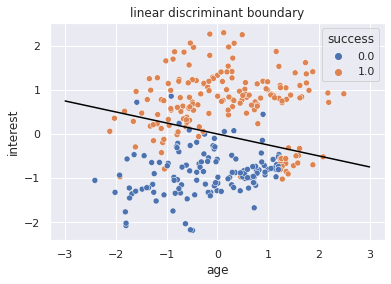

In [ ]:
model = linearDiscriminant()
m0,m1 = model.findMean(X1_0,X2_0, X1_1, X2_1)              # Calulate mean for class 0 and class 1
Sb = model.findSb(m0,m1)                                   # Calculate Sb
Sw = model.findSw(X1_0,X2_0,X1_1,X2_1,m0,m1)               # Calculate Sw
eigval, eigvec = model.calcEigen(Sw,Sb)                    # Calculate eigen values and eigen vectors




eigen_pair = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pair = sorted(eigen_pair,key=lambda j: j[0],reverse=True)

w = eigen_pair[0][1]                                      # Eigenvector for largest Eigenvalue
ax = sns.scatterplot(data=df,x=df['age'], y=df['interest'],  hue=df['success'])
ax.set_title('linear discriminant boundary')
line_x = np.linspace(-3, 3)
print(w)
line_y = - (w[0] / w[1]) * line_x
line_y = line_y.transpose()
ax.plot(line_x, line_y, color='black')

**OBSERVATIONS:**

*   We use the Linear discriminant technique to plot the decision boundary.
*   Idea is to maximize a function that- gives the largest separation between the projected class means, but also gives a small variance within each class, minimizing the class overlap.
*   So we find the projection that maximizes the class separation. 
*   Decision Boundary here performs better than Logistic Regression.





### 6.Logistic regression considers only linear decision boundaries. One way to go from linear decision boundaries to non-linear decision boundaries is by considering polynomial curve of higher degree. For example, if input attributes are x1, x2 then transforming it into 2 degree polynomial will give features: {x1, x2, x2^1, x2^2, x1x2, 1}. Identify an appropriate degree of the transformation that results in the optimal performance via logistic regression. Clearly explain your choice.

### 7. Above expansion will result in non-linear decision boundary. Plot the boundary along with the dataset points.

In [ ]:
copy_data2 = copy_data.copy()
copy_data3 = copy_data.copy()
x1_square = copy_data['age']**2
x2_squre = copy_data['interest']**2
x1x2 = copy_data['age'] * copy_data['interest']
c_1 = copy_data['age']**0
copy_data['x1_square'] = x1_square
copy_data['x2_squre'] = x2_squre
copy_data['x1x2'] = x1x2
copy_data['c_1'] = c_1
copy_data

,age,interest,x1_square,x2_squre,x1x2,c_1
0,-0.005867,-1.283180,0.000034,1.646552,0.007528,1.0
1,-0.128374,-1.323815,0.016480,1.752487,0.169943,1.0
2,0.999394,-0.799421,0.998789,0.639074,-0.798937,1.0
3,-1.920167,-0.970912,3.687042,0.942670,1.864313,1.0
4,-1.051840,-1.378487,1.106367,1.900225,1.449947,1.0
...,...,...,...,...,...,...
292,0.450613,-1.285945,0.203052,1.653655,-0.579464,1.0
293,-0.967194,1.141170,0.935464,1.302269,-1.103733,1.0
294,-0.163333,0.979355,0.026678,0.959137,-0.159961,1.0
295,0.222363,1.967736,0.049445,3.871983,0.437551,1.0


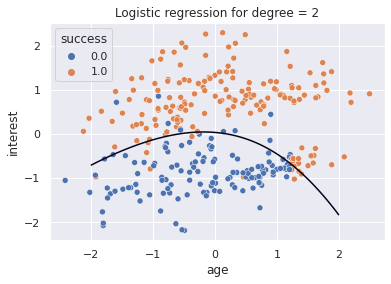

In [ ]:
model = logisticRegression()
theta = model.lr_findW(copy_data, y , 0.1)

x1 = np.linspace(-2, 2, 297)
x2= np.linspace(-2, 2, 297)
X1,X2 = np.meshgrid(x1,x2)
X1 = np.ravel(X1)
X2 = np.ravel(X2)
Y = np.zeros((len(x1) * len(x2)))
Y = theta[0]+theta[1]*X1 + theta[2]*X2 + theta[3]*X1**2 + theta[4]*X2**2 + theta[5]*X1*X2 + theta[6]*1
X1 = X1.reshape((len(x1), len(x2)))
X2 = X2.reshape((len(x1), len(x2)))
Y = Y.reshape((len(x1), len(x2)))
ax = sns.scatterplot(data=df,x=df['age'], y=df['interest'],  hue=df['success'])
ax.set_title('Logistic regression for degree = 2')
ax.contour(X1,X2,Y,[0])


In [ ]:
x1_cube = copy_data2['age']**3
x2_cube = copy_data2['interest']**3
x1square_x2 = (copy_data2['age']**2) * copy_data2['interest']
x1x2_square = copy_data2['age'] * (copy_data2['interest']**2)
c_1 = copy_data2['age']**0
copy_data2['x1_cube'] = x1_cube
copy_data2['x2_cube'] = x2_cube
copy_data2['x1square_x2'] = x1square_x2
copy_data2['x1x2_square'] = x1x2_square
copy_data2['c_1'] = c_1
copy_data2

,age,interest,x1_cube,x2_cube,x1square_x2,x1x2_square,c_1
0,-0.005867,-1.283180,-2.019522e-07,-2.112823,-0.000044,-0.009660,1.0
1,-0.128374,-1.323815,-2.115584e-03,-2.319968,-0.021816,-0.224974,1.0
2,0.999394,-0.799421,9.981844e-01,-0.510890,-0.798453,0.638687,1.0
3,-1.920167,-0.970912,-7.079737e+00,-0.915250,-3.579794,-1.810084,1.0
4,-1.051840,-1.378487,-1.163721e+00,-2.619435,-1.525112,-1.998733,1.0
...,...,...,...,...,...,...,...
292,0.450613,-1.285945,9.149782e-02,-2.126511,-0.261114,0.745158,1.0
293,-0.967194,1.141170,-9.047744e-01,1.486111,1.067523,-1.259547,1.0
294,-0.163333,0.979355,-4.357307e-03,0.939336,0.026127,-0.156658,1.0
295,0.222363,1.967736,1.099477e-02,7.619039,0.097295,0.860985,1.0


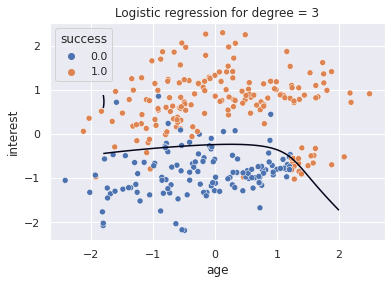

In [ ]:
model = logisticRegression()
theta = model.lr_findW(copy_data2, y , 0.1)

x1 = np.linspace(-1.8, 2, 297)
x2= np.linspace(-1.8, 2, 297)
X1,X2 = np.meshgrid(x1,x2)
X1 = np.ravel(X1)
X2 = np.ravel(X2)
Y = np.zeros((len(x1) * len(x2)))
Y = theta[0]+theta[1]*X1 + theta[2]*X2 + theta[3]*X1**3 + theta[4]*X2**3 + theta[5]*(X1**2)*X2 + theta[6]*X1*(X2**2) + theta[7]*1
X1 = X1.reshape((len(x1), len(x2)))
X2 = X2.reshape((len(x1), len(x2)))
Y = Y.reshape((len(x1), len(x2)))
ax = sns.scatterplot(data=df,x=df['age'], y=df['interest'],  hue=df['success'])
ax.set_title('Logistic regression for degree = 3')
ax.contour(X1,X2,Y,[0])


In [ ]:
x1_4 = copy_data3['age']**4
x2_4 = copy_data3['interest']**4
x1_2_x2_2 = copy_data3['age']**2 * copy_data3['interest']**2
x1_3_x2 = copy_data3['age']**3 * copy_data3['interest']
x1_x2_3 = copy_data3['age'] * copy_data3['interest']**3
c_1 = copy_data3['age']**0
copy_data3['x1_4'] = x1_4
copy_data3['x2_4'] = x2_4
copy_data3['x1_2_x2_2'] = x1_2_x2_2
copy_data3['x1_3_x2'] = x1_3_x2
copy_data3['x1_x2_3'] = x1_x2_3
copy_data3['c_1'] = c_1
copy_data3

,age,interest,x1_4,x2_4,x1_2_x2_2,x1_3_x2,x1_x2_3,c_1
0,-0.005867,-1.283180,1.184854e-09,2.711133,0.000057,2.591411e-07,0.012396,1.0
1,-0.128374,-1.323815,2.715858e-04,3.071209,0.028881,2.800643e-03,0.297823,1.0
2,0.999394,-0.799421,9.975799e-01,0.408416,0.638300,-7.979698e-01,-0.510580,1.0
3,-1.920167,-0.970912,1.359428e+01,0.888627,3.475665,6.873802e+00,1.757433,1.0
4,-1.051840,-1.378487,1.224049e+00,3.610856,2.102347,1.604174e+00,2.755226,1.0
...,...,...,...,...,...,...,...,...
292,0.450613,-1.285945,4.123009e-02,2.734576,0.335778,-1.176612e-01,-0.958233,1.0
293,-0.967194,1.141170,8.750920e-01,1.695906,1.218225,-1.032502e+00,-1.437357,1.0
294,-0.163333,0.979355,7.116900e-04,0.919943,0.025587,-4.267351e-03,-0.153424,1.0
295,0.222363,1.967736,2.444827e-03,14.992253,0.191451,2.163479e-02,1.694190,1.0


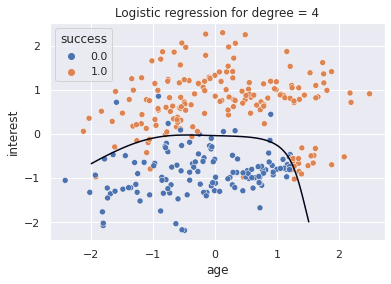

In [ ]:
model = logisticRegression()
theta = model.lr_findW(copy_data3, y , 0.1)

x1 = np.linspace(-2, 2, 297)
x2= np.linspace(-2, 2, 297)
X1,X2 = np.meshgrid(x1,x2)
X1 = np.ravel(X1)
X2 = np.ravel(X2)
Y = np.zeros((len(x1) * len(x2)))
Y = theta[0]+theta[1]*X1 + theta[2]*X2 + theta[3]*X1**4 + theta[4]*X2**4 + theta[5]*(X1**2)*(X2**2) + theta[6]*(X1**3)*(X2) + theta[7]*X1*(X2**3) + theta[8]*1
X1 = X1.reshape((len(x1), len(x2)))
X2 = X2.reshape((len(x1), len(x2)))
Y = Y.reshape((len(x1), len(x2)))
ax = sns.scatterplot(data=df,x=df['age'], y=df['interest'],  hue=df['success'])
ax.set_title('Logistic regression for degree = 4')
ax.contour(X1,X2,Y,[0])

**OBSERVATIONS:**

*   We plot non-linear boundary for degree = 2, 3, 4.
*   As we can see that for degree = 4, the decision boundary obtained is more accurate than degree = 2 & 3.

